# QF 627 Extras - Financial Analytics
## Problem-Sets for Exercise `4` | `RE`view | `REVISTED`

> Hi Team! 👋

> Below you will find four intriguing analytic questions that you are likely to face in your day-to-day operations in the field. Just like our prior exercise problem sets, these questions are not meant for testing. As you work through them, you will find further consolidation of what you have learned from our class, lecture notes, and PyDay consultations.

> As discussed in class, during our PyDay, after our leaders of problem-solving have led the session, I'll go through some (if not all) of the problem set questions so that you can learn how to come up with model solutions for your benchmark in field practice.

> Enjoy 🤗

### <font color = green> Activation of necessary libraries for setting your print options

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## <font color = red> Below, you will find `four larger sets` of questions. 
    
## <font color = tomato> Please ensure that you demonstrate the workflow of your problem-solving process for these business analytics questions. 
    
## <font color = tomato> Specifically, follow these steps: import → wrangle → EDA → further wrangle (if necessary) → visualize and/or model → refine the model and/or visualization → report.

## ❓ <a id = "top"> List of Analytic Questions </a> ❓

## [Q1. Propensity Score Matching with Inverse Probability Weights](#p1)

> ### <font color = red> 1 </font>

## [Q2. Difference-in-Differences](#p2)

> ### <font color = red> 2 </font>

## [Q3. RDD warm-up](#p3)

> ### <font color = red> RDD </font>

## [Q4. RDD](#p4)

> ### <font color = red> RDD </font>

## <a id = "p1"> </a> <font color = "red"> Big Question 1: Effects of Investing in Real Estate on Annual Returns [back to table of contents](#top)

### <font color = green> BUSINESS CONTEXT & ANALYTIC QUESTION
    
> You want to evaluate the impact of investment in real estate (InvestRealEstate) on annual returns (AnnualReturn). However, investment decisions are influenced by observable characteristics such as age, income, and risk tolerance. To account for these confounders, you use propensity score matching with inverse probability weighting.

### <mark> Dataset </mark> https://talktoroh.com/s/q1_psm_ipw.csv

### <font color = green> LIST of VARIABLES

* `InvestRealEstate` (binary: 0 = no, 1 = yes)

* `AnnualReturn` (numerical)

* `Age` (numerical)

* `Income` (numerical)

* `RiskTolerance` (numerical, scale 1-10)

### <font color = red> Steps to Answer the Question

    1. Import Your Data

    2. Wrangle Your Data

    3. Estimate propensity scores using logistic regression.

    4. Calculate inverse probability weights.

    5. Estimate the weighted regression of AnnualReturn on InvestRealEstate.

    6. Visualize the distribution of propensity scores by treatment group and the weighted regression results.

    7. Report the estimated treatment effect.

### IMPORT

In [2]:
data1 =\
(
    pd
    .read_csv("https://talktoroh.com/s/q1_psm_ipw.csv")
)

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvestRealEstate  1984 non-null   int64  
 1   AnnualReturn      1984 non-null   float64
 2   Age               1984 non-null   float64
 3   Income            1984 non-null   float64
 4   RiskTolerance     1984 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 77.6 KB


### WRANGLE

In [4]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
InvestRealEstate,1984.0,0.977319,0.148923,0.000000,1.000000,1.000000,1.000000,1.000000
AnnualReturn,1984.0,4456.516883,4964.505066,-11234.500112,1250.037010,4381.802388,7674.761021,20436.924103
Age,1984.0,39.850477,9.787662,9.538569,33.157893,39.842693,46.165661,71.709748
Income,1984.0,74184.225086,19678.458640,197.987241,60470.952387,74112.608884,87873.989499,151033.204299
RiskTolerance,1984.0,5.438280,2.594679,1.004419,3.131046,5.443661,7.693630,9.999610


### <mark>sanity check</mark>

In [5]:
data1_CLEANED =\
(
    data1
    [data1["Age"] >= 18]
)

data1_CLEANED.describe().T

,count,mean,std,min,25%,50%,75%,max
InvestRealEstate,1960.0,0.977551,0.148176,0.000000,1.000000,1.000000,1.000000,1.000000
AnnualReturn,1960.0,4452.989509,4964.989673,-11234.500112,1250.037010,4381.802388,7685.246892,20436.924103
Age,1960.0,40.159864,9.432969,18.210685,33.418985,40.034966,46.255647,71.709748
Income,1960.0,74188.895884,19701.575535,197.987241,60470.952387,74133.531741,87873.989499,151033.204299
RiskTolerance,1960.0,5.434613,2.590744,1.004419,3.139925,5.435053,7.686193,9.999610


In [6]:
data1_CLEANED["InvestRealEstate"].unique()

array([1, 0])

In [7]:
len(data1) - len(data1_CLEANED)

24

### <mark>standardization of scales</mark>

In [8]:
data1_CLEANED.columns

Index(['InvestRealEstate', 'AnnualReturn', 'Age', 'Income', 'RiskTolerance'], dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler # Z-scoring

In [10]:
scaler = StandardScaler()

In [11]:
data1_CLEANED[['Age', 'Income', 'RiskTolerance']] =\
(
    scaler # algorithm --> 
    .fit_transform(data1_CLEANED
                   [['Age', 'Income', 'RiskTolerance']]
                  )
)

/var/folders/k1/7yl62fwx2879_758cjywcjrw0000gn/T/ipykernel_52844/2067545394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_CLEANED[['Age', 'Income', 'RiskTolerance']] =\


In [12]:
data1_CLEANED.describe().T

,count,mean,std,min,25%,50%,75%,max
InvestRealEstate,1960.0,9.775510e-01,0.148176,0.000000,1.000000,1.000000,1.000000,1.000000
AnnualReturn,1960.0,4.452990e+03,4964.989673,-11234.500112,1250.037010,4381.802388,7685.246892,20436.924103
Age,1960.0,2.084500e-17,1.000255,-2.327452,-0.714791,-0.013244,0.646386,3.345493
Income,1960.0,1.151007e-16,1.000255,-3.756542,-0.696464,-0.002811,0.694797,3.901410
RiskTolerance,1960.0,-2.066374e-16,1.000255,-1.710445,-0.885951,0.000170,0.869308,1.762490


### <mark>Calculate propensity scores</mark>

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logit = LogisticRegression()

In [15]:
import warnings
from sklearn.exceptions import ConvergenceWarning

(
    warnings
    .filterwarnings("ignore",
                    category = ConvergenceWarning)
)

In [16]:
# logit =\
#     LogisticRegression(solver = "lbfgs", # failed to converge
#                        max_iter = 1000, # 3000)
#                        tol = , # --> why don't you loose tolerance
#                        C = 
#                       )

In [17]:
covariates = data1_CLEANED[['Age', 'Income', 'RiskTolerance']]

outcome = data1_CLEANED["InvestRealEstate"]

In [18]:
(
    logit
    .fit(covariates, outcome)
)

LogisticRegression()

In [19]:
data1_CLEANED["propensity_scores"] =\
( # probability of being treated
    logit
    .predict_proba(covariates) # returns numpy array
    [ : , 1]
    # take every observation, take second column only
) # first column (probability of not treated); second column (probability of being treated)

/var/folders/k1/7yl62fwx2879_758cjywcjrw0000gn/T/ipykernel_52844/3677682399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_CLEANED["propensity_scores"] =\


In [20]:
data1_CLEANED.head()

,InvestRealEstate,AnnualReturn,Age,Income,RiskTolerance,propensity_scores
0,1,-1163.636939,1.853618,-0.566186,0.858731,0.988941
1,1,5186.752488,0.407368,-1.502277,-0.377490,0.934887
2,1,4794.919756,1.020885,0.465471,0.058471,0.993764
3,1,-285.574387,2.359251,0.000545,1.373579,0.995661
4,1,5213.401160,1.963374,-1.238016,0.545737,0.973600


In [21]:
data1_CLEANED["ipw"] =\
(
    (data1_CLEANED["InvestRealEstate"] 
     / 
     data1_CLEANED["propensity_scores"]
    )
    +
    (
        (1 - data1_CLEANED["InvestRealEstate"])
        /
        (1 - data1_CLEANED["propensity_scores"])
    )
)

/var/folders/k1/7yl62fwx2879_758cjywcjrw0000gn/T/ipykernel_52844/2982431809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_CLEANED["ipw"] =\


In [22]:
data1_CLEANED.tail()

,InvestRealEstate,AnnualReturn,Age,Income,RiskTolerance,propensity_scores,ipw
1979,1,1271.484215,-1.187745,0.532100,-0.055830,0.992460,1.007598
1980,1,-32.535807,-0.853702,-1.657031,-0.765930,0.897190,1.114591
1981,1,-2925.930004,-0.015628,0.672839,1.144451,0.997020,1.002989
1982,1,7786.964923,-0.186549,0.915418,1.168851,0.997696,1.002309
1983,1,-9809.544644,-0.899145,-1.675870,0.201236,0.936307,1.068026


### <mark>Ultimate Regression for Causal Effects Estimation</mark>

In [23]:
import statsmodels.formula.api as smf

In [24]:
data1_CLEANED.columns

Index(['InvestRealEstate', 'AnnualReturn', 'Age', 'Income', 'RiskTolerance',
       'propensity_scores', 'ipw'],
      dtype='object')

In [25]:
ps_with_ipw =\
(
    # statsmodels
    # .formula
    # .api
    smf
    .wls(formula = "AnnualReturn ~ InvestRealEstate", 
         data = data1_CLEANED,
         weights = data1_CLEANED["ipw"]
        )
    .fit()
)

In [26]:
(
    ps_with_ipw
    .summary()
    .tables[1]
)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3171.6122,182.614,17.368,0.000,2813.474,3529.751
InvestRealEstate,1290.7409,246.016,5.247,0.000,808.259,1773.222


### <mark>Make sure to run randomization (balance) checks</mark>

### <font color = red> Report </font> 

In [27]:
estimated_causal_effects =\
(
    ps_with_ipw
    .params["InvestRealEstate"]
)

In [28]:
print(f"Investing in real estate increases annual returns by approximately ${estimated_causal_effects:.2f}")

Investing in real estate increases annual returns by approximately $1290.74


> Investing in real estate increases annual returns by approximately $ _1290.74_ .

## <a id = "p2"> </a> <font color = "red"> Big Question 2: Policy Impact on Housing Prices [back to table of contents](#top)

### <font color = green> BUSINESS CONTEXT & ANALYTIC QUESTION
    
> A new property tax policy was implemented in 2010 aimed at reducing real estate speculation. You want to analyze its impact on the average price of houses (HousePrice) using a difference-in-differences approach. You have data on house prices before (2008-2009) and after (2011-2012) the policy for both treated (cities affected by the policy) and control (cities not affected) groups.

### <mark> Dataset </mark> https://talktoroh.com/s/q2_DiD.csv

### <font color = green> LIST of VARIABLES

* `HousePrice` (numerical)

* `Year` (categorical: 2008, 2009, 2011, 2012)

* `Treated` (binary: 0 = no, 1 = yes)

* `Post` (binary: 0 = pre-policy, 1 = post-policy)

### <font color = red> Steps to Answer the Question

    1. Import Your Data

    2. Wrangle Your Data

    3. Generate synthetic data for 2015 observations.

    4. Create a binary variable indicating whether the observation is post-policy.

    5. Estimate the DiD regression model.

    6. Visualize the average house prices over time for treated and control groups.

    7. Report the estimated treatment effect of the policy on house prices.

### IMPORT

In [29]:
data2 =\
(
    pd
    .read_csv("https://talktoroh.com/s/q2_DiD.csv")
)

In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HousePrice  2015 non-null   float64
 1   Year        2015 non-null   int64  
 2   Treated     2015 non-null   int64  
 3   Post        2015 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 63.1 KB


In [31]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
HousePrice,2015.0,253562.118895,29365.923614,165722.698517,234603.832073,253589.675717,274393.594844,344852.161319
Year,2015.0,2009.986600,1.589226,2008.000000,2008.000000,2009.000000,2012.000000,2012.000000
Treated,2015.0,0.504715,0.500102,0.000000,0.000000,1.000000,1.000000,1.000000
Post,2015.0,0.492804,0.500072,0.000000,0.000000,0.000000,1.000000,1.000000


In [32]:
data2["Treated"].unique()

array([0, 1])

### WRANGLE

### <mark>sanity check</mark>

In [33]:
data2["TimeFrame"] =\
(
    data2
    ["Year"]
    .apply(lambda x: 1 if x >= 2010 
                       else 0)
)

data2.head()

,HousePrice,Year,Treated,Post,TimeFrame
0,264166.842067,2008,0,0,0
1,254387.765119,2012,0,1,1
2,241541.072299,2009,0,0,0
3,222244.975957,2008,1,0,0
4,246998.489755,2012,1,1,1


### MODEL (make sure to run <mark>formal</mark> modeling)

$$
    {HousePrice} = \beta_0 + \beta_1 \times {Treated} + \beta_2 \times {Post} + \widehat{\beta_3} \times ({Treated} \times {Post}) + \epsilon
$$

$$
    {HousePrice} = b_0 + b_1 \times {Treated} + b_2 \times {Post} + \widehat{b_3} \times ({Treated} \times {Post}) + \epsilon
$$

In [34]:
%who

ConvergenceWarning	 LogisticRegression	 StandardScaler	 covariates	 data1	 data1_CLEANED	 data2	 estimated_causal_effects	 logit	 
mpl	 np	 outcome	 pd	 plt	 ps_with_ipw	 scaler	 smf	 warnings	 



In [35]:
did =\
(
    smf
    .ols(formula = "HousePrice ~ Treated * Post",
         data = data2
        )
    .fit()
)

In [36]:
did.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.499e+05,1312.368,190.428,0.000,2.47e+05,2.52e+05
Treated,9200.2446,1824.119,5.044,0.000,5622.885,1.28e+04
Post,4732.3766,1844.910,2.565,0.010,1114.243,8350.510
Treated:Post,-1.373e+04,2597.835,-5.285,0.000,-1.88e+04,-8634.187


In [37]:
%who

ConvergenceWarning	 LogisticRegression	 StandardScaler	 covariates	 data1	 data1_CLEANED	 data2	 did	 estimated_causal_effects	 
logit	 mpl	 np	 outcome	 pd	 plt	 ps_with_ipw	 scaler	 smf	 
warnings	 


In [38]:
estimated_causal_effects_did =\
(
    did
    .params["Treated:Post"]
    *
    -1
)

In [39]:
print(f"The policy reduced house prices by approximately ${estimated_causal_effects_did: .2f} in treated.")

The policy reduced house prices by approximately $ 13728.92 in treated.


### Team, make sure to check <mark>the parallel assumption</mark>.

### <font color = red> Report </font> 

> The policy reduced house prices by approximately $________ in treated.

## <a id = "p3"> </a> <font color = "red"> Big Question 3: Effects of tutoring program on improvement in test scores [back to table of contents](#top)    

### <font color = green> ANALYTIC CONTEXT
    
> You are a policymaker in the field of educational policy. 
    
> At the beginning of a school year, students take an entrance exam. Those who score 70 or below are automatically enrolled in a free tutoring program and receive assistance throughout the year. At the end of the school year, students take a final test, or exit exam (with a maximum of 100 points), to measure their overall learning. 
    
> Fortunately, as a policymaker, you possess expertise in econometric designs and methods. Using your expertise, please assess whether the tutoring program had a causal impact on students' improvement in test scores. If so, by how much?

### <mark> Dataset </mark> https://talktoroh.com/s/educational_policy-jkd4.csv

### <font color = green> LIST of VARIABLES

* `id`: Student ID
<br>    
* `tutoring`: Categorical variable showing whether the student was enrolled in the tutoring program
<br>
    
* `entrance_exam`: Student's entrance exam score (out of 100)
<br>    
    
* `exit_exam`: Student's exit exam score (out of 100)

### <font color = red> IMPORT

In [40]:
data3 =\
(
    pd
    .read_csv("https://talktoroh.com/s/educational_policy-jkd4.csv")
)

### <font color = red> WRANGLE </font>

In [41]:
data3.head()

,id,entrance_exam,tutoring,tutoring_text,exit_exam
0,1,92.4,False,No tutor,78.1
1,2,72.8,False,No tutor,58.2
2,3,53.7,True,Tutor,62.0
3,4,98.3,False,No tutor,67.5
4,5,69.7,True,Tutor,54.1


In [42]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   entrance_exam  1000 non-null   float64
 2   tutoring       1000 non-null   bool   
 3   tutoring_text  1000 non-null   object 
 4   exit_exam      1000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 32.4+ KB


In [43]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
entrance_exam,1000.0,78.1427,12.726496,28.8,70.60,80.2,87.70,99.8
exit_exam,1000.0,66.1646,7.625894,42.8,61.10,66.5,71.90,84.5


### <font color = red> Exploratory Data Analysis </font>

<Axes: xlabel='entrance_exam', ylabel='exit_exam'>

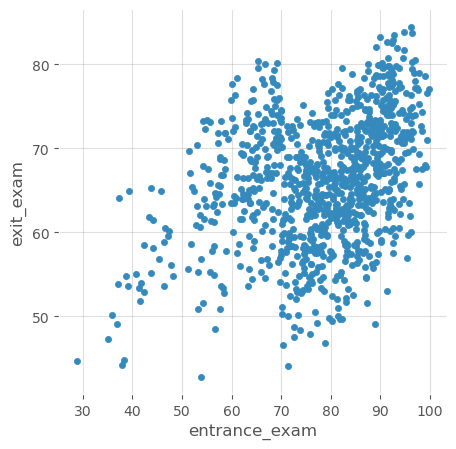

In [44]:
figure, axis =\
(
    plt
    .subplots(1, 1, 
              figsize = [5, 5]
             )
)

(
    data3
    .plot
    .scatter(x = "entrance_exam",
             y = "exit_exam",
             ax = axis)
)

In [45]:
dummy =\
pd.DataFrame(
    {"A": np.array([1,2,3])
    }
            )

In [46]:
dummy -= 2

In [47]:
dummy

,A
0,-1
1,0
2,1


In [48]:
data3["entrance_exam"] -= 70 # yes or no

data3.head()

,id,entrance_exam,tutoring,tutoring_text,exit_exam
0,1,22.4,False,No tutor,78.1
1,2,2.8,False,No tutor,58.2
2,3,-16.3,True,Tutor,62.0
3,4,28.3,False,No tutor,67.5
4,5,-0.3,True,Tutor,54.1


<Axes: xlabel='entrance_exam', ylabel='exit_exam'>

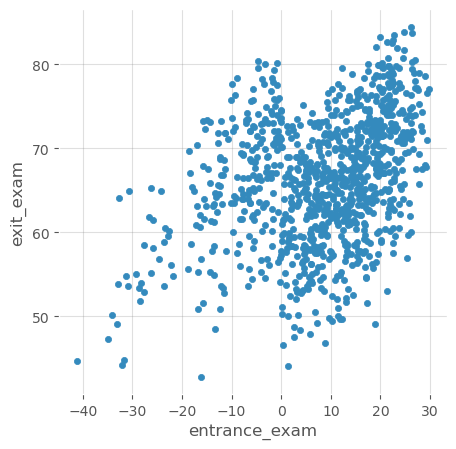

In [49]:
figure, axis =\
(
    plt
    .subplots(1, 1, 
              figsize = [5, 5]
             )
)

(
    data3
    .plot
    .scatter(x = "entrance_exam",
             y = "exit_exam",
             ax = axis)
)

In [50]:
from lets_plot import *
LetsPlot.setup_html()

In [51]:
data3.columns

Index(['id', 'entrance_exam', 'tutoring', 'tutoring_text', 'exit_exam'], dtype='object')

In [52]:
(
    ggplot(data3,
          aes(x = "entrance_exam",
              y = "exit_exam",
              group = "tutoring",
              color = "tutoring") # global setting
          )
    + geom_point(alpha = 0.5)
    + theme(legend_position = "top")
)

### <font color = red> Modeling or Visualization </font>

In [53]:
data3_for_rdd =\
(
    data3
    .assign(threshold = 
             (data3["entrance_exam"] > 0)
             .astype(float)
           )
)

In [54]:
data3_for_rdd

,id,entrance_exam,tutoring,tutoring_text,exit_exam,threshold
0,1,22.4,False,No tutor,78.1,1.0
1,2,2.8,False,No tutor,58.2,1.0
2,3,-16.3,True,Tutor,62.0,0.0
3,4,28.3,False,No tutor,67.5,1.0
4,5,-0.3,True,Tutor,54.1,0.0
...,...,...,...,...,...,...
995,996,-26.3,True,Tutor,65.3,0.0
996,997,-30.8,True,Tutor,53.6,0.0
997,998,20.3,False,No tutor,76.7,1.0
998,999,-7.8,True,Tutor,69.3,0.0


### Prepare <mark>Kernel</mark> Weights

In [55]:
def kernel_weights(R, c, h):
    indicator = (np.abs(R - c) <= h).astype(float)
    return indicator * (1 - np.abs(R - c) / h)

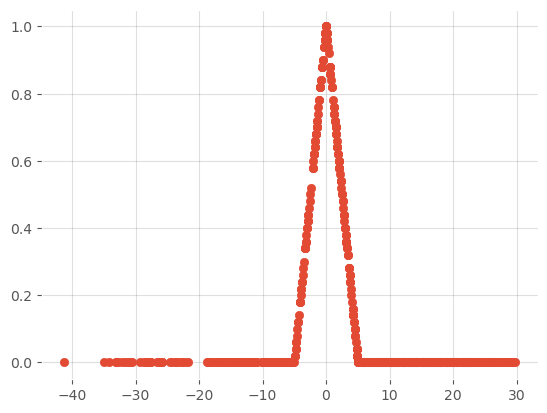

In [56]:
(
    plt
    .scatter(data3["entrance_exam"], # x-axis
             kernel_weights(data3["entrance_exam"],
                            c = 0,
                            h = 5), # y-axis
            )
)

### <font color = red> Visualization or Modeling </font> 

In [57]:
data3.columns

Index(['id', 'entrance_exam', 'tutoring', 'tutoring_text', 'exit_exam'], dtype='object')

In [58]:
rdd =\
(
    smf
    .wls(formula = "exit_exam ~ entrance_exam * threshold",
         data = data3_for_rdd,
         weights = kernel_weights(data3["entrance_exam"],
                                  c = 0,
                                  h = 5)
        )
    .fit()
)

In [59]:
(
    rdd
    .summary()
    .tables[1]
)

/opt/homebrew/anaconda3/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:806: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,69.4086,0.480,144.587,0.000,68.467,70.351
entrance_exam,0.2278,0.263,0.866,0.387,-0.288,0.744
threshold,-9.7045,0.733,-13.232,0.000,-11.144,-8.265
entrance_exam:threshold,0.6009,0.370,1.626,0.104,-0.124,1.326


In [60]:
estimated_causal_effects_rdd =\
(
    (
    # Rate of Change
    (rdd.params["threshold"] + rdd.params["Intercept"])
    /
    rdd.params["Intercept"] - 1 # has to be intercept
    )
    * 100
    * -1
)

In [61]:
estimated_causal_effects_rdd

np.float64(13.981752219345033)

In [62]:
data3_for_rdd.columns

Index(['id', 'entrance_exam', 'tutoring', 'tutoring_text', 'exit_exam',
       'threshold'],
      dtype='object')

In [63]:
(
    ggplot(data3_for_rdd,
           aes(x = "entrance_exam",
               y = "exit_exam",
               group = "threshold") # team, threshold is not float
           )
    + geom_point(color = "grey",
                 alpha = 0.30)
    + geom_smooth(aes(color = as_discrete("threshold")
                     ),
                  se = False # mute confidence intervals first
                 )
    + scale_color_manual(values = ["blue", "red"],
                         name = "Cut-Off for Tutoring Program",
                         labels = ["Non-Tutoring", "Tutoring"]
                        )
    + theme(legend_position = "top")
    + labs(title = "Causal effects of the Tutoring Program on Exit Exam Scores",
           subtitle = f"Effect Size: {estimated_causal_effects_rdd:.2f} %",
           y = "Exit Exam Scores")
    + geom_label(x = 0,
                 y = 64.0,
                 label = "Look at the drift!",
                 color = "red")
)

> `Answer`: `Please provide your assessment of the causal effects here.`

## <a id = "p4"> </a> <font color = "red"> Big Question 4: Effects of FED conference talk on the stock prices of companies [back to table of contents](#top)    

### <font color = green> ANLYTIC CONTEXT: Causal Inference Question in Hand
    
> You are given a dataset related to the impact of a Federal Reserve (FED) conference talk on the stock prices of companies. The talk, which took place 100 days ago, is expected to have significant implications for financial markets, creating a `natural` experiment for assessing its effect. The dataset includes stock prices of several companies for a period of 100 days before and 100 days after the conference talk, up to today.

### <mark> Dataset </mark> https://talktoroh.com/s/fed_conference_talk.csv

### <font color = green> LIST of VARIABLES

- `company_id`: Unique identifier for each company.
<br>

- `date`: Date of the stock price observation.
<br>

- `stock_price`: Stock price of the company.
<br>

- `policy_change`: Indicator variable (0 = before FED talk, 1 = after FED talk).
<br>

- `days_to_policy`: Number of days to the FED talk (negative values = before talk, positive values = after talk).

### <font color = green> Your analysis should contain the following processes, aligned with the analytics workflow.

- Plot the stock prices against the days to policy change to visually inspect any discontinuity at the cutoff.

- Implement the RDD using the following steps:

- Define the cutoff point.

- Fit a regression model on both sides of the cutoff.

- Apply triangle kernel weights to estimate LATE.

- Provide a detailed interpretation of the estimated effect of the FED conference talk on stock prices.

### <font color = red> IMPORT

In [64]:
data4 =\
(
    pd
    .read_csv("https://talktoroh.com/s/fed_conference_talk.csv")
)

In [65]:
data4

,company_id,date,stock_price,policy_change,days_to_policy
0,1,2023-11-18,102.483571,0,-100
1,1,2023-11-19,99.308678,0,-99
2,1,2023-11-20,103.238443,0,-98
3,1,2023-11-21,107.615149,0,-97
4,1,2023-11-22,98.829233,0,-96
...,...,...,...,...,...
10045,50,2024-06-01,107.722113,1,96
10046,50,2024-06-02,105.317688,1,97
10047,50,2024-06-03,109.725304,1,98
10048,50,2024-06-04,103.800321,1,99


### <font color = red> WRANGLE </font>

In [66]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_id      10050 non-null  int64  
 1   date            10050 non-null  object 
 2   stock_price     10050 non-null  float64
 3   policy_change   10050 non-null  int64  
 4   days_to_policy  10050 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 392.7+ KB


In [67]:
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
company_id,10050.0,25.500000,14.431588,1.000000,13.000000,25.50000,38.000000,50.000000
stock_price,10050.0,102.535136,5.751297,81.994574,98.495249,102.49874,106.418388,122.934011
policy_change,10050.0,0.502488,0.500019,0.000000,0.000000,1.00000,1.000000,1.000000
days_to_policy,10050.0,0.000000,58.025871,-100.000000,-50.000000,0.00000,50.000000,100.000000


In [68]:
threshold_for_rdd = 0

### <font color = red> Exploratory Data Analysis </font>

In [69]:
from lets_plot import *
LetsPlot.setup_html()

In [70]:
data4.columns

Index(['company_id', 'date', 'stock_price', 'policy_change', 'days_to_policy'], dtype='object')

In [71]:
data4.policy_change

0        0
1        0
2        0
3        0
4        0
        ..
10045    1
10046    1
10047    1
10048    1
10049    1
Name: policy_change, Length: 10050, dtype: int64

In [72]:
(
    ggplot(data4,
           aes(x = "days_to_policy",
               y = "stock_price",
               # group = as_discrete("policy_change"),
               color = as_discrete("policy_change")
              )
          )
    + geom_point(aes(color = as_discrete("policy_change")
                    ),
                 alpha = 0.30,
                 )
    # + geom_vline(xintercept = threshold_for_rdd,
    #              color = "green")
    + labs(title = "Stock Price in relation to Policy Change",
           x = "Days to Policy",
           y = "Stock Price")
    + theme(legend_position = "top")
)

### <font color = red> Visualization or Modeling </font>

In [73]:
data4.columns

Index(['company_id', 'date', 'stock_price', 'policy_change', 'days_to_policy'], dtype='object')

In [74]:
data4["diff_to_threshold"] =\
(
    data4["days_to_policy"] - threshold_for_rdd
)

In [75]:
data4["threshold_binary"] =\
(
    data4["days_to_policy"] >= threshold_for_rdd
).astype(int)

In [76]:
import statsmodels.formula.api as smf

In [77]:
model1 =\
(
    smf
    .ols(formula = "policy_change ~ diff_to_threshold + threshold_binary",
         data = data4)
    .fit()
                       # y        ~       B1                B2
)

In [78]:
data4["estimated_policy_change"] =\
(
    model1
    .fittedvalues
)

In [79]:
data4

,company_id,date,stock_price,policy_change,days_to_policy,diff_to_threshold,threshold_binary,estimated_policy_change
0,1,2023-11-18,102.483571,0,-100,-100,0,-3.477274e-15
1,1,2023-11-19,99.308678,0,-99,-99,0,-3.409004e-15
2,1,2023-11-20,103.238443,0,-98,-98,0,-3.340735e-15
3,1,2023-11-21,107.615149,0,-97,-97,0,-3.272466e-15
4,1,2023-11-22,98.829233,0,-96,-96,0,-3.204197e-15
...,...,...,...,...,...,...,...,...
10045,50,2024-06-01,107.722113,1,96,96,1,1.000000e+00
10046,50,2024-06-02,105.317688,1,97,97,1,1.000000e+00
10047,50,2024-06-03,109.725304,1,98,98,1,1.000000e+00
10048,50,2024-06-04,103.800321,1,99,99,1,1.000000e+00


In [80]:
data4.columns

Index(['company_id', 'date', 'stock_price', 'policy_change', 'days_to_policy',
       'diff_to_threshold', 'threshold_binary', 'estimated_policy_change'],
      dtype='object')

In [81]:
model2 =\
(
    smf
    .ols(formula = "stock_price ~ diff_to_threshold + estimated_policy_change",
         data = data4)
    .fit()
)

In [82]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            stock_price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     1122.
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:39:43   Log-Likelihood:                -30829.
No. Observations:               10050   AIC:                         6.166e+04
Df Residuals:                   10047   BIC:                         6.168e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 100.0263      0.116    858.906      0.000      99.798     100.255
diff_to_threshold          -0.0008      0.002     -0.437      0.662      -0.004       0.003
estimated_policy_change     4.9929      0.208     24.062      0.000       4.586       5.400
==============================================================================
Omnibus:                        1.916   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.936
Skew:                           0.001   Prob(JB):                        0.380
Kurtosis:                       3.068   Cond. No.                         261.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
data4["fitted_prices"] =\
(
    model2
    .fittedvalues
)

In [84]:
data4.head(2)

,company_id,date,stock_price,policy_change,days_to_policy,diff_to_threshold,threshold_binary,estimated_policy_change,fitted_prices
0,1,2023-11-18,102.483571,0,-100,-100,0,-3.477274e-15,100.104425
1,1,2023-11-19,99.308678,0,-99,-99,0,-3.409004e-15,100.103643


In [85]:
def kernel(R, c, h):
    metric = (np.abs(R-c) <= h).astype(int)
    return metric * (1 - np.abs(R-c)/h)

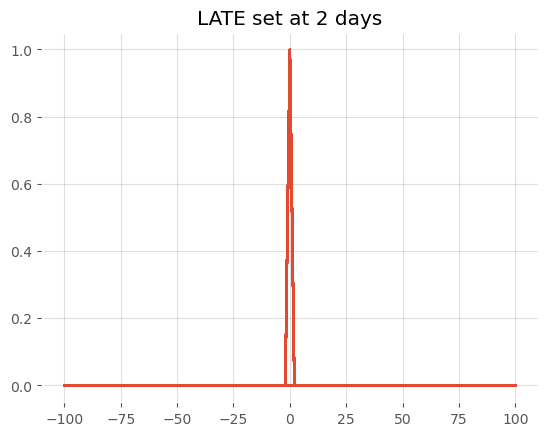

In [86]:
(
    plt
    .plot(data4["days_to_policy"],
          kernel(data4["days_to_policy"],
                 c = 0, h = 2)
         )
)

plt.title("LATE set at 2 days")
plt.show()

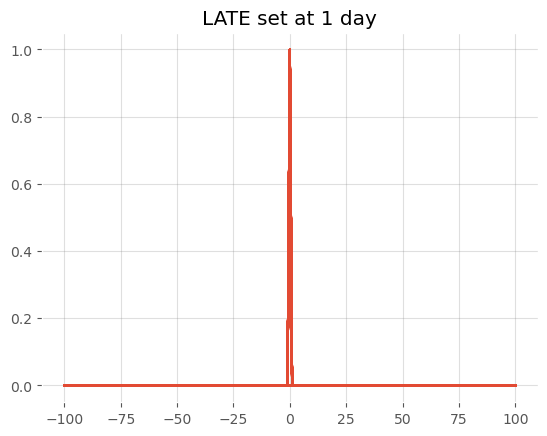

In [87]:
(
    plt
    .plot(data4["days_to_policy"],
          kernel(data4["days_to_policy"],
                 c = 0, h = 1)
         )
)

plt.title("LATE set at 1 day")
plt.show()

### <font color = red> Modeling or Visualization </font> 

In [88]:
data4.head(2)

,company_id,date,stock_price,policy_change,days_to_policy,diff_to_threshold,threshold_binary,estimated_policy_change,fitted_prices
0,1,2023-11-18,102.483571,0,-100,-100,0,-3.477274e-15,100.104425
1,1,2023-11-19,99.308678,0,-99,-99,0,-3.409004e-15,100.103643


In [89]:
model1_kernel =\
(
    smf
    .wls(formula = "policy_change ~ diff_to_threshold + threshold_binary",
         data = data4,
         weights = kernel(data4["days_to_policy"],
                          c = 0,
                          h = 3) # 3 days for LATE
        )
    .fit()
)

data4["estimated_policy_change_kernel"] =\
(
    model1_kernel
    .fittedvalues
)

In [90]:
data4.columns

Index(['company_id', 'date', 'stock_price', 'policy_change', 'days_to_policy',
       'diff_to_threshold', 'threshold_binary', 'estimated_policy_change',
       'fitted_prices', 'estimated_policy_change_kernel'],
      dtype='object')

In [91]:
model2_kernel =\
(
    smf
    .wls(formula = "stock_price ~ diff_to_threshold + estimated_policy_change_kernel",
         data = data4,
         weights = kernel(data4["diff_to_threshold"],
                          c = 0,
                          h = 3) # 3 days for `L`ATE
        )
    .fit()
)

In [92]:
model2_kernel.summary()

/opt/homebrew/anaconda3/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:806: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            stock_price   R-squared:                       0.121
Model:                            WLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     693.7
Date:                Sat, 28 Jun 2025   Prob (F-statistic):          6.19e-283
Time:                        22:39:43   Log-Likelihood:                   -inf
No. Observations:               10050   AIC:                               inf
Df Residuals:                   10047   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        101.8173      0.126    807.006      0.000     101.570     102.065
diff_to_threshold                  0.5806      0.072      8.117      0.000       0.440       0.721
estimated_policy_change_kernel     2.5161      0.175     14.360      0.000       2.173       2.860
==============================================================================
Omnibus:                     4312.399   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7361402.245
Skew:                           0.309   Prob(JB):                         0.00
Kurtosis:                     135.586   Cond. No.                         6.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
data4.columns

Index(['company_id', 'date', 'stock_price', 'policy_change', 'days_to_policy',
       'diff_to_threshold', 'threshold_binary', 'estimated_policy_change',
       'fitted_prices', 'estimated_policy_change_kernel'],
      dtype='object')

In [94]:
data4["fitted_prices_to_input"] =\
(
    model2_kernel
    .fittedvalues
)

In [95]:
effect_size_in_percent =\
(
    (model2_kernel.params["diff_to_threshold"] + model2_kernel.params["Intercept"])
    /                    # B2 of interest
    model2_kernel.params["Intercept"]
    - 1
) * 100

### <font color = red> Visualization or Modeling </font> 

In [96]:
(
    ggplot(data4,
           aes(x = "diff_to_threshold",
               y = "stock_price")
          )
    + geom_point(alpha = 0.30)
    + geom_line(aes(y = "fitted_prices_to_input"),
                color = "red")
    + labs(x = "Distance to Policy Implementation",
           y = "Stock Price",
           title = "Causal Effects of Policy Implementation",
           subtitle = f"Effect size: {np.round(effect_size_in_percent, 1)}%",
           caption = "Yes, something is NOT right here."
           )
)

## <mark>Revisionist Approach</mark>

In [97]:
data4.columns

Index(['company_id', 'date', 'stock_price', 'policy_change', 'days_to_policy',
       'diff_to_threshold', 'threshold_binary', 'estimated_policy_change',
       'fitted_prices', 'estimated_policy_change_kernel',
       'fitted_prices_to_input'],
      dtype='object')

In [98]:
data4.head(2)

,company_id,date,stock_price,policy_change,days_to_policy,diff_to_threshold,threshold_binary,estimated_policy_change,fitted_prices,estimated_policy_change_kernel,fitted_prices_to_input
0,1,2023-11-18,102.483571,0,-100,-100,0,-3.477274e-15,100.104425,-3.983619e-14,43.753192
1,1,2023-11-19,99.308678,0,-99,-99,0,-3.409004e-15,100.103643,-3.942680e-14,44.333833


In [99]:
rdd_model =\
(
    smf
    .ols(formula = "stock_price ~ days_to_policy * policy_change",
         data = data4)
    .fit()
)

rdd_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,100.2238,0.148,676.399,0.000,99.933,100.514
days_to_policy,0.0031,0.003,1.229,0.219,-0.002,0.008
policy_change,4.9852,0.207,24.026,0.000,4.578,5.392
days_to_policy:policy_change,-0.0077,0.004,-2.156,0.031,-0.015,-0.001


In [100]:
causal_effects_in_percent =\
(
    (rdd_model.params["policy_change"] + rdd_model.params["Intercept"])
    /
    rdd_model.params["Intercept"]
    - 1
) * 100

In [101]:
(
    ggplot(data4,
           aes(x = "days_to_policy",
               y = "stock_price"
              )
          )
    + geom_point(color = "grey",
                 alpha = 0.30)
    + geom_smooth(aes(color = as_discrete("policy_change")
                     ),
                  se = False
                 )
    + scale_color_manual(values = ["blue", "red"],
                         name = "Policy Change",
                         labels = ["Before vs. ", "After Policy Change"]
                        )
    + labs(title = "Impact of Policy Change on Stock Market",
           subtitle = f"Because of policy change, the stock price goes up {causal_effects_in_percent:.1f} %",
           y = "Stock Price",
           x = "Days to Policy Change",
           caption = "Be sure to use a kernel function to estimate the Local Average Treatment Effect (LATE)\nin your next step of analysis.")
    + theme(legend_position = "top")
    + geom_label(x = 0,
                 y = 102.7,
                 label = "Look at the jump",
                 color = "green")
)

> `Answer`: `Please provide your assessment of the causal effects here.`

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>